In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import tensorflow_docs as  tfdocs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [53]:
!pip install -q git+https://github.com/tensorflow/docs


In [160]:
dataframe=pd.read_excel('total_deaths_and_carbon_budget.xlsx')
def df_to_dataset(dataframe, shuffle=True, batch_size=5):
  dataframe = dataframe.copy()
  labels = dataframe.pop('deaths(per 100000)')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds
labels=dataframe.pop('deaths(per 100000)')
print(dataframe)

train_stats = dataframe.describe()

train_stats = train_stats.transpose()
train_stats

    Year  Total  coal   Oil   Gas  Cement  Flaring  Per Capita
0   2005   8024  3170  3000  1473     262       82        1.23
1   2006   8290  3350  3022  1511     285       83        1.25
2   2007   8538  3511  3032  1561     306       87        1.27
3   2008   8732  3646  3041  1606     310       90        1.29
4   2009   8606  3603  2992  1571     320       88        1.25
5   2010   9048  3822  3067  1691     341       90        1.30
6   2011   9354  4062  3069  1731     366       88        1.33
7   2012   9496  4106  3124  1765     375       89        1.33
8   2013   9541  4075  3163  1787     389       91        1.32
9   2014   9614  4077  3204  1801     403       92        1.32
10  2015   9618  3996  3259  1842     392       92        1.30
11  2016   9656  3941  3309  1879     400       91        1.29
12  2017   9774  3953  3350  1938     403       94        1.29
13  2018   9982  4007  3391  2043     411       94        1.31


,count,mean,std,min,25%,50%,75%,max
Year,14.0,2011.500000,4.183300,2005.00,2008.250,2011.500,2014.7500,2018.00
Total,14.0,9162.357143,616.885179,8024.00,8637.500,9425.000,9617.0000,9982.00
coal,14.0,3808.500000,301.803234,3170.00,3613.750,3947.000,4048.2500,4106.00
Oil,14.0,3144.500000,136.348958,2992.00,3034.250,3096.500,3245.2500,3391.00
Gas,14.0,1728.500000,168.753689,1473.00,1579.750,1748.000,1831.7500,2043.00
Cement,14.0,354.500000,49.774491,262.00,312.500,370.500,398.0000,411.00
Flaring,14.0,89.357143,3.586452,82.00,88.000,90.000,91.7500,94.00
Per Capita,14.0,1.291429,0.031344,1.23,1.275,1.295,1.3175,1.33


In [161]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(dataframe)


def build_model():
  model = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=[len(dataframe.keys())]),
   # layers.Dense(20, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


model=build_model()


In [162]:
EPOCHS = 10000
historye=model.fit(
  dataframe,labels,
  epochs=EPOCHS, validation_split = 0, verbose=0)

In [163]:
hist = pd.DataFrame(historye.history)
hist.head()
hist['epoch'] = historye.epoch
hist.tail()

,loss,mae,mse,epoch
9995,57144.886719,175.480225,57144.886719,9995
9996,57133.492188,177.689133,57133.492188,9996
9997,57144.312500,175.479172,57144.312500,9997
9998,57132.867188,177.688995,57132.867188,9998
9999,57143.750000,175.478760,57143.750000,9999


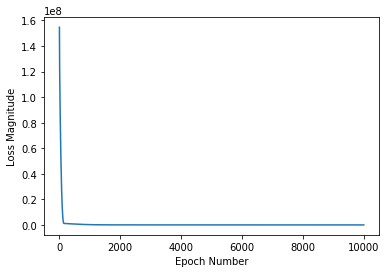

In [164]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(historye.history['loss'])
plt.show()


In [165]:
#print(model.predict([100.0]))

In [169]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[-0.32007027,  0.24273111, -0.65376884, -0.20946367,  0.7375202 ,
         0.43165472,  0.9470593 , -0.19364935,  0.1454854 , -0.7852076 ,
         0.4444094 , -0.6463202 ,  0.74987626, -0.3186016 , -0.14829001,
        -0.42320058,  0.29737896,  0.10439539, -0.46214533, -0.72582316],
       [-0.4578457 ,  0.2614736 ,  0.21787485, -0.03798857,  0.04943275,
         0.03257319, -0.27209485, -0.14563933, -0.39478874,  0.3817375 ,
        -0.19708043,  0.30989528,  0.22227727, -0.14927888,  0.0700779 ,
        -0.14245251,  0.27102593, -0.07315298, -0.31220555,  0.41253644],
       [-0.3534871 , -0.05758354,  0.14622833,  0.24495159,  0.63994443,
         0.47624063,  0.46688762,  0.21424526,  0.33067197, -0.28931955,
         0.5757102 , -0.22454475, -0.20584941, -0.21454293, -0.3692556 ,
        -0.18204665,  0.6413893 ,  0.20375954,  0.06916934, -0.4082495 ],
       [-0.3833551 ,  0.0333249 ,  0.16324499, -0.09442943,  0.4469098 ,
         0.02700

In [168]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
test_predictions = model.predict(dataframe).flatten()

print(test_predictions)


In [ ]:
labels

In [157]:
loss, mae, mse = model.evaluate(dataframe,labels, verbose=2)

14/14 - 0s - loss: 55994.5977 - mae: 172.3696 - mse: 55994.5977


[8952.51   8915.812  8807.406  8764.615  8804.302  8473.999  8474.845
 8371.943  8202.306  8109.44   7904.867  7661.8413 7424.0234 6993.5396]


0     8888.44
1     8819.71
2     8753.54
3     8648.24
4     8585.57
5     8478.26
6     8453.24
7     8231.15
8     8080.95
9     7896.79
10    8077.98
11    7835.23
12    7775.93
13    6328.58
Name: deaths(per 100000), dtype: float64